In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.describe(include=object)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


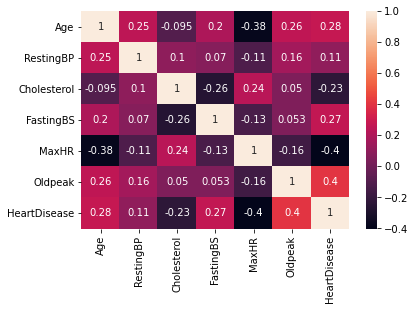

In [9]:
sns.heatmap(df.corr(), annot=True)

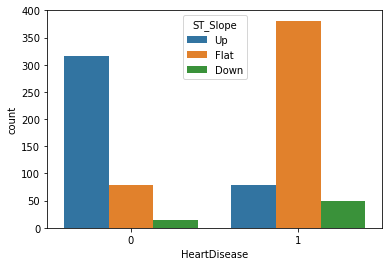

In [10]:
sns.countplot(data=df, x='HeartDisease', hue='ST_Slope')

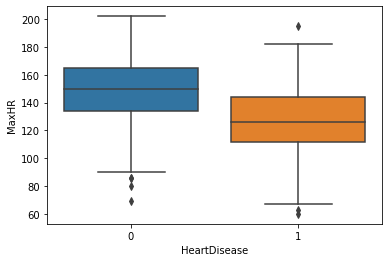

In [11]:
sns.boxplot(data=df, y='MaxHR', x='HeartDisease')

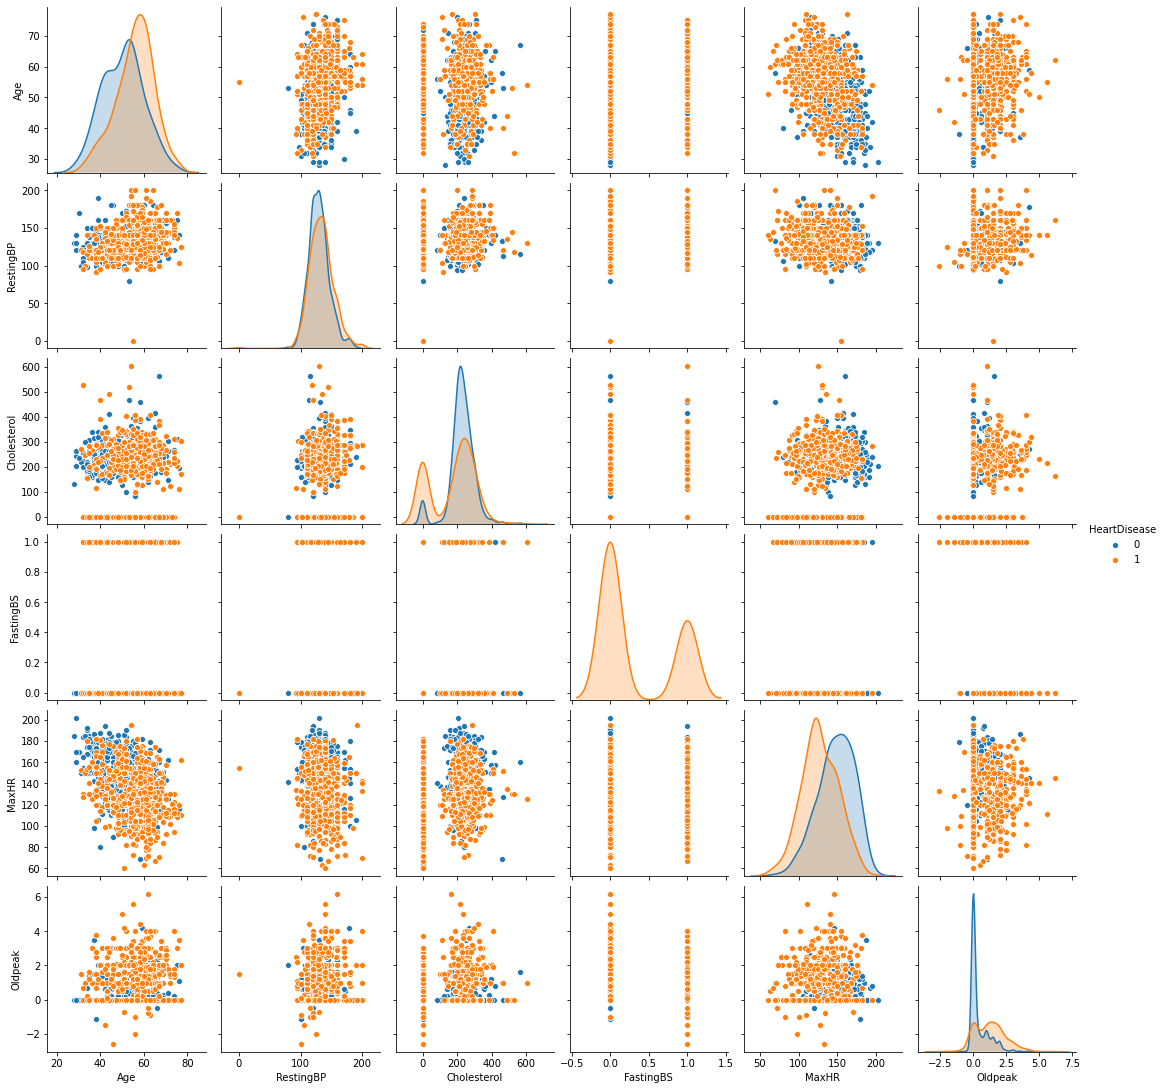

In [12]:
sns.pairplot(data=df, hue='HeartDisease')

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

In [14]:
df.select_dtypes(exclude=object).columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [15]:
df_object = df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]

In [16]:
df_num = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']]

In [17]:
df_object = pd.get_dummies(df_object, drop_first=True)

In [18]:
df_object

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,1,1,0,0,1,0,0,0,1
1,0,0,1,0,1,0,0,1,0
2,1,1,0,0,0,1,0,0,1
3,0,0,0,0,1,0,1,1,0
4,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
913,1,0,0,1,1,0,0,1,0
914,1,0,0,0,1,0,0,1,0
915,1,0,0,0,1,0,1,1,0
916,0,1,0,0,0,0,0,1,0


In [19]:
df = pd.concat([df_object, df_num], axis=1)

In [20]:
df

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,0,0,1,0,0,0,1,40,140,289,0,172,0.0,0
1,0,0,1,0,1,0,0,1,0,49,160,180,0,156,1.0,1
2,1,1,0,0,0,1,0,0,1,37,130,283,0,98,0.0,0
3,0,0,0,0,1,0,1,1,0,48,138,214,0,108,1.5,1
4,1,0,1,0,1,0,0,0,1,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,0,0,1,1,0,0,1,0,45,110,264,0,132,1.2,1
914,1,0,0,0,1,0,0,1,0,68,144,193,1,141,3.4,1
915,1,0,0,0,1,0,1,1,0,57,130,131,0,115,1.2,1
916,0,1,0,0,0,0,0,1,0,57,130,236,0,174,0.0,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex_M              918 non-null    uint8  
 1   ChestPainType_ATA  918 non-null    uint8  
 2   ChestPainType_NAP  918 non-null    uint8  
 3   ChestPainType_TA   918 non-null    uint8  
 4   RestingECG_Normal  918 non-null    uint8  
 5   RestingECG_ST      918 non-null    uint8  
 6   ExerciseAngina_Y   918 non-null    uint8  
 7   ST_Slope_Flat      918 non-null    uint8  
 8   ST_Slope_Up        918 non-null    uint8  
 9   Age                918 non-null    int64  
 10  RestingBP          918 non-null    int64  
 11  Cholesterol        918 non-null    int64  
 12  FastingBS          918 non-null    int64  
 13  MaxHR              918 non-null    int64  
 14  Oldpeak            918 non-null    float64
 15  HeartDisease       918 non-null    int64  
dtypes: float64(1), int64(6), u

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sex_M,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType_ATA,918.0,0.188453,0.391287,0.0,0.00,0.0,0.0,1.0
ChestPainType_NAP,918.0,0.221133,0.415236,0.0,0.00,0.0,0.0,1.0
ChestPainType_TA,918.0,0.050109,0.218289,0.0,0.00,0.0,0.0,1.0
RestingECG_Normal,918.0,0.601307,0.489896,0.0,0.00,1.0,1.0,1.0
RestingECG_ST,918.0,0.193900,0.395567,0.0,0.00,0.0,0.0,1.0
ExerciseAngina_Y,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
ST_Slope_Flat,918.0,0.501089,0.500271,0.0,0.00,1.0,1.0,1.0
ST_Slope_Up,918.0,0.430283,0.495386,0.0,0.00,0.0,1.0,1.0
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0


In [23]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
X = df.drop('HeartDisease', axis=1)

In [26]:
y = df['HeartDisease']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [29]:
scaler = StandardScaler()

In [30]:
scaled_X_train = scaler.fit_transform(X_train)

In [31]:
scaled_X_test = scaler.transform(X_test)

In [32]:
scaled_X_train

array([[ 0.51223561, -0.47579561, -0.5347722 , ..., -0.56392168,
         0.12604344,  0.28685911],
       [-1.95222663,  2.10174281, -0.5347722 , ..., -0.56392168,
         1.22225152, -0.87237183],
       [-1.95222663,  2.10174281, -0.5347722 , ..., -0.56392168,
         0.51754633, -0.87237183],
       ...,
       [ 0.51223561, -0.47579561, -0.5347722 , ...,  1.77329589,
         0.67414748,  2.70192356],
       [ 0.51223561, -0.47579561, -0.5347722 , ..., -0.56392168,
        -0.77441319,  0.09365395],
       [ 0.51223561, -0.47579561,  1.86995509, ..., -0.56392168,
         0.71329777,  2.02570551]])

In [33]:
scaled_X_test

array([[ 0.51223561, -0.47579561, -0.5347722 , ..., -0.56392168,
        -0.38291031, -0.87237183],
       [ 0.51223561, -0.47579561, -0.5347722 , ...,  1.77329589,
        -0.34376002, -2.3214105 ],
       [ 0.51223561,  2.10174281, -0.5347722 , ..., -0.56392168,
         0.51754633, -0.87237183],
       ...,
       [ 0.51223561, -0.47579561, -0.5347722 , ...,  1.77329589,
        -0.65696232, -0.87237183],
       [ 0.51223561, -0.47579561, -0.5347722 , ..., -0.56392168,
        -0.03055771, -0.87237183],
       [-1.95222663, -0.47579561,  1.86995509, ..., -0.56392168,
        -0.069708  , -0.87237183]])

In [34]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [35]:
model = LogisticRegression(max_iter=5000)

In [36]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
l1_ratio = np.logspace(0, 10, 20)
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [37]:
param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'solver': solver}

In [38]:
grid = GridSearchCV(model, param_grid, scoring='accuracy', cv=10, verbose=1)

In [39]:
grid.fit(scaled_X_train, y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:   32.8s finished


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=5000),
             param_grid={'l1_ratio': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

In [40]:
grid.best_estimator_.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 1.0,
 'max_iter': 5000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [41]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, plot_roc_curve

In [42]:
pred = grid.predict(scaled_X_test)

In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       101
           1       0.85      0.84      0.85       129

    accuracy                           0.83       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.83      0.83      0.83       230



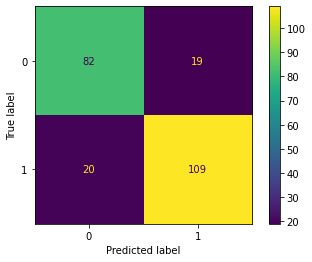

In [44]:
plot_confusion_matrix(grid, scaled_X_test, y_test)

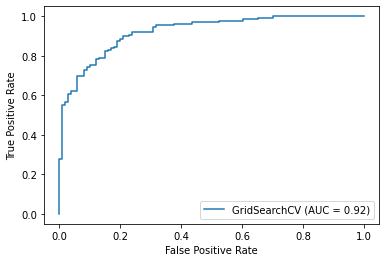

In [45]:
plot_roc_curve(grid, scaled_X_test, y_test)